In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import backend as K
%matplotlib inline

In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [12]:
df = pd.read_csv('/content/drive/My Drive/Final_Practicum/stance/stance_cleaned.csv', encoding='UTF-8')
df['full_text']=df['full_text'].astype(str)
df.head()

,full_text,Stance
0,trend Hope I wo n't c ever Mamtabanerje trend ...,BJP
1,Do check rap,BJP
2,PM Modi 's Lok Sabha performance three word I ...,BJP
3,'What use degree I sell egg ' The job crisis Modi,BJP
4,PM India friend Israel & amp Palestine India f...,BJP


In [13]:
df = df[df['Stance'] != "Neutral"]
df.head(10)

,full_text,Stance
0,trend Hope I wo n't c ever Mamtabanerje trend ...,BJP
1,Do check rap,BJP
2,PM Modi 's Lok Sabha performance three word I ...,BJP
3,'What use degree I sell egg ' The job crisis Modi,BJP
4,PM India friend Israel & amp Palestine India f...,BJP
5,Today modi ji like,BJP
6,Watch 's broadcast Speaking Watch,BJP
7,Today 's Pic 's Chief Whip Shri Ji Shri Ji & a...,BJP
8,The full majority come It also come 2014 also ...,BJP
9,PM reply Motion Thanks 's address dubbed oppos...,BJP


Text(0.5, 1.0, 'Number of tweets for each partys')

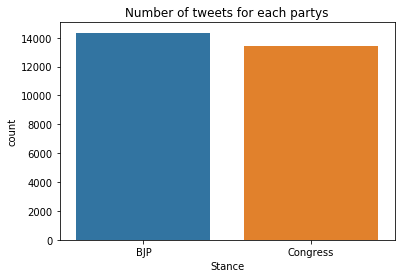

In [14]:
sns.countplot(df.Stance)
plt.xlabel('Stance')
plt.title('Number of tweets for each partys')

In [0]:
X = df.full_text
Y = df.Stance
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [16]:
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
max_words = 10000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
def Sequential():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [20]:
model = Sequential()
model.summary()
#model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy',f1_m,precision_m, recall_m])
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [21]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.000001)])

Train on 18888 samples, validate on 4722 samples
Epoch 1/10
18888/18888 [==============================] - 62s 3ms/step - loss: 0.5052 - acc: 0.7362 - val_loss: 0.4302 - val_acc: 0.7950
Epoch 2/10
18888/18888 [==============================] - 61s 3ms/step - loss: 0.3328 - acc: 0.8514 - val_loss: 0.3774 - val_acc: 0.8280
Epoch 3/10
18888/18888 [==============================] - 60s 3ms/step - loss: 0.2889 - acc: 0.8764 - val_loss: 0.3850 - val_acc: 0.8297


In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [23]:
accr = model.evaluate(test_sequences_matrix,Y_test)

4167/4167 [==============================] - 19s 5ms/step


In [24]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.366
  Accuracy: 0.829


In [0]:
model.save("/content/drive/My Drive/Final_Practicum/stance/model.h5")

In [0]:
from keras.models import load_model

In [0]:
model=load_model("/content/drive/My Drive/Final_Practicum/stance/model.h5")

In [28]:
!ls '/content/drive/My Drive/Final_Practicum/sentiment140'

All_Tweets_cleaned.csv	  senti_airline_naive_tfidf.ipynb
All_Tweets_cleaned.ipynb  Sentiment140_processing2.ipynb
All_Tweets.csv		  Sentiment_Analysis_Dataset.csv
AllTweets.csv		  Sentiment_cleaned.csv
LSTM_Base		  Tfidf_Naive
model.h5		  Tweets.ipynb


In [29]:
All_Tweets = pd.read_csv('/content/drive/My Drive/Final_Practicum/sentiment140/All_Tweets.csv', encoding ='latin-1')


All_Tweets.head()

,id_str,full_text,date
0,1073324973878580000,RT @AzharChatriwala: BJP Failed As They Forgot...,12/13/2018
1,1073152356831890000,RT @TRUTH3101: @narendramodi I THINK STILL FAI...,12/13/2018
2,1073087703590330000,RT @TRUTH3101: @SanjayK67846860 @narendramodi ...,12/13/2018
3,1073087678218940000,RT @TRUTH3101: @CNNnews18 @INCMP @Arunima24 TH...,12/13/2018
4,1073085620115910000,RT @TRUTH3101: I THINK STILL FAILED TO UNDERST...,12/13/2018


In [0]:
common = All_Tweets.merge(df,on=['full_text'])


In [31]:

All_Tweets=All_Tweets[(~All_Tweets.full_text.isin(common.full_text))]
print(All_Tweets)

                     id_str  ...        date
0       1073324973878580000  ...  12/13/2018
1       1073152356831890000  ...  12/13/2018
2       1073087703590330000  ...  12/13/2018
3       1073087678218940000  ...  12/13/2018
4       1073085620115910000  ...  12/13/2018
5       1073236584953190000  ...  12/13/2018
6       1072481122871860000  ...  12/11/2018
7       1074899253888040000  ...  12/18/2018
8       1074654257440280000  ...  12/17/2018
9       1073870672344960000  ...  12/15/2018
10      1073866647276900000  ...  12/15/2018
11      1073847911539220000  ...  12/15/2018
12      1073499687208960000  ...  12/14/2018
13      1073477516508060000  ...  12/14/2018
14      1073477192435290000  ...  12/14/2018
15      1073467794811830000  ...  12/14/2018
16      1073462233462690000  ...  12/14/2018
17      1073381326802310000  ...  12/14/2018
18      1073274755816480000  ...  12/13/2018
19      1073267311287480000  ...  12/13/2018
20      1073246361309580000  ...  12/13/2018
21      10

In [0]:
All_Tweets['full_text']=All_Tweets['full_text'].astype(str)

In [0]:
pred_sequences = tok.texts_to_sequences(All_Tweets['full_text'])
pred_sequences_matrix = sequence.pad_sequences(pred_sequences,maxlen=200)

In [0]:
Predicted_Stance = model.predict(pred_sequences_matrix)

In [35]:
Predicted_Stance

array([[0.02357578],
       [0.24426359],
       [0.88570654],
       ...,
       [0.9999988 ],
       [1.        ],
       [0.9999993 ]], dtype=float32)

In [0]:
labels = (Predicted_Stance < 0.5).astype(np.int)


In [37]:
All_Tweets['label']=pd.Series(labels.tolist())
print(All_Tweets)

                     id_str  ... label
0       1073324973878580000  ...   [1]
1       1073152356831890000  ...   [1]
2       1073087703590330000  ...   [0]
3       1073087678218940000  ...   [1]
4       1073085620115910000  ...   [1]
5       1073236584953190000  ...   [1]
6       1072481122871860000  ...   [1]
7       1074899253888040000  ...   [1]
8       1074654257440280000  ...   [1]
9       1073870672344960000  ...   [0]
10      1073866647276900000  ...   [0]
11      1073847911539220000  ...   [1]
12      1073499687208960000  ...   [1]
13      1073477516508060000  ...   [0]
14      1073477192435290000  ...   [1]
15      1073467794811830000  ...   [1]
16      1073462233462690000  ...   [1]
17      1073381326802310000  ...   [0]
18      1073274755816480000  ...   [1]
19      1073267311287480000  ...   [1]
20      1073246361309580000  ...   [0]
21      1073218649220130000  ...   [1]
22      1073209356416660000  ...   [1]
23      1073195530023500000  ...   [1]
24      10731615737981700

In [52]:
All_Tweets=All_Tweets.dropna()
All_Tweets.head()

,id_str,full_text,date,label
0,1073324973878580000,RT @AzharChatriwala: BJP Failed As They Forgot...,12/13/2018,[1]
1,1073152356831890000,RT @TRUTH3101: @narendramodi I THINK STILL FAI...,12/13/2018,[1]
2,1073087703590330000,RT @TRUTH3101: @SanjayK67846860 @narendramodi ...,12/13/2018,[0]
3,1073087678218940000,RT @TRUTH3101: @CNNnews18 @INCMP @Arunima24 TH...,12/13/2018,[1]
4,1073085620115910000,RT @TRUTH3101: I THINK STILL FAILED TO UNDERST...,12/13/2018,[1]


In [0]:
All_Tweets.to_csv('/content/drive/My Drive/Final_Practicum/stance/Stance_Prediction.csv', header= True, index=False)


In [50]:
!ls '/content/drive/My Drive/Final_Practicum/stance'

labelled_tweets.csv	   stance_cleaned.csv	   Stance_Prediction.csv
model.h5		   Stance_Detection.ipynb
new_Stance_Prediction.csv  Stance_lstm.ipynb


In [0]:
data=pd.read_csv('/content/drive/My Drive/Final_Practicum/stance/new_Stance_Prediction.csv')